# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash' привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash' основная таблица с информацией о учащихся
- scores.csv &mdash' список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash' таблица посещений занятий по этому предмету
- school_support.txt &mdash' список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash' построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash' возраст
- Medu &mdash' уровень образования матери (по некоторой условной шкале)
- Fedu &mdash' уровень образования отца (по некоторой условной шкале)
- traveltime &mdash' время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash' время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash' насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash' количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash' время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash' количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash' количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash' уровень здоровья (по некоторой условной шкале)
- sex_M &mdash' пол: мужской (1) или женский (0)
- address_U &mdash' живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash' размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash' живут ли родители вместе (1) или отдельно (0)
- nursery &mdash' посещал ли учащийся детский сад
- plans_university &mdash' планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash' количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash' всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

plans_university = []
past_failures = []

for i in range(len(data["plans_universitypast_failures"])):
    plans_university.append(-1 if data["plans_universitypast_failures"][i] < 0 else 1)
    past_failures.append(abs(data["plans_universitypast_failures"][i]) % 10)

data["plans_university"] = plans_university
data["past_failures"] = past_failures

data = data.drop("plans_universitypast_failures", axis = 1)

df = pd.DataFrame(data)
df.to_csv("data_new.csv", index = False)



### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [45]:
import pandas as pd

data = pd.read_csv('data_new.csv')

for i in data.columns.to_list():
    data.loc[data[i].isnull(), i] = (data[i].median())

data.to_csv("data_not_null.csv", index = False)



### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [48]:
import pandas as pd

data = pd.read_csv('data_not_null.csv')

for i in data.columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

data.to_csv('data_normalize.csv', index = False)



### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data_normalize.csv')
score_ = pd.read_csv('scores.csv', header=None, names=['score'])

X = data
y = score_['score']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

for i, score in enumerate(scores, 1):
    print(f"Фолд {i}: R^2 = {score:.4f}")

print(f"Средний Фолд: R^2 = {scores.mean():.4f}")

Фолд 1: R^2 = 0.2188
Фолд 2: R^2 = 0.2584
Фолд 3: R^2 = 0.1416
Фолд 4: R^2 = 0.2329
Средний Фолж: R^2 = 0.2129


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

attendance = pd.read_csv('attendance.csv', sep=';')
data = pd.read_csv('data_not_null.csv')
school_support = [int(i.strip()) for i in open('school_support.txt', 'r')]

data['count'] = 0

for i in attendance.columns:
    attendance.loc[attendance[i] == '+', i] = 1
    attendance.loc[attendance[i].isnull(), i]  = 0


for i in range(attendance.shape[0]):
    data.loc[i, 'count'] = attendance.loc[i].sum();

data['mother_support'] = 0

for i in school_support:
    data.loc[i, 'mother_support'] = 1

data.to_csv('new.csv', index=False)

for i in data.columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

score_ = pd.read_csv('scores.csv', header=None, names=['score'])

X = data
y = score_['score']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

for i, score in enumerate(scores, 1):
    print(f"Фолд {i}: R^2 = {score:.4f}")

print(f"Средний Фолд: R^2 = {scores.mean():.4f}")


Фолд 1: R^2 = 0.2501
Фолд 2: R^2 = 0.2772
Фолд 3: R^2 = 0.1091
Фолд 4: R^2 = 0.2335
Средний Фолж: R^2 = 0.2175


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

Фолд 1: R^2 = 0.2455
Фолд 2: R^2 = 0.2718
Фолд 3: R^2 = 0.1166
Фолд 4: R^2 = 0.2191
Средний Фолж: R^2 = 0.2133


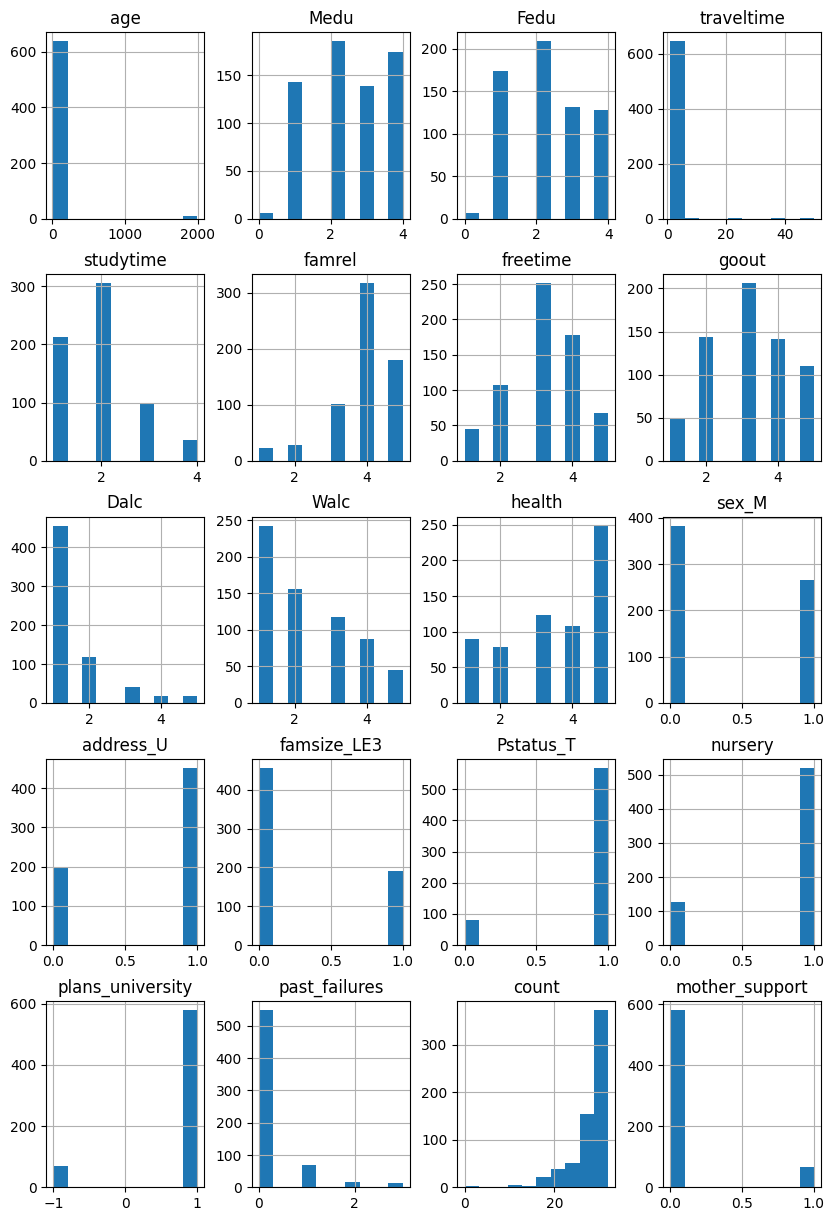

In [ ]:
import pandas as pd

data = pd.read_csv('new.csv')
data.hist(figsize=(10, 15), column=data.columns)

data.loc[data['age'] > 1500, 'age'] = 2025 - data['age']

for i in range(data.shape[0]):
    if data.loc[i, 'traveltime'] > 4:
        if data.loc[i, 'traveltime'] < 15:
            data.loc[i, 'traveltime'] = 1
        elif data.loc[i, 'traveltime'] <= 30:
            data.loc[i, 'traveltime'] = 2
        elif data.loc[i, 'traveltime'] <= 60:
            data.loc[i, 'traveltime'] = 3
        else:
            data.loc[i, 'traveltime'] = 4; 


data.to_csv('clear_data.csv', index=False)
for i in data.columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())


score_ = pd.read_csv('scores.csv', header=None, names=['score'])

X = data
y = score_['score']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

for i, score in enumerate(scores, 1):
    print(f"Фолд {i}: R^2 = {score:.4f}")

print(f"Средний Фолд: R^2 = {scores.mean():.4f}")




__(1.5 балла)__

Другой простой способ найти выбросы &mdash' сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash' это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом' для проверки &mdash' в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [ ]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data, result) #create model and train it
prediction = #calculate prediction for one object for vector x
error = (prediction - y)**2 #simple error - square error

SyntaxError: invalid syntax (3289234131.py, line 4)

In [ ]:
# Your code here
# ...

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
# Your code here
# ...